# Vehicle dataset

In [ ]:
# https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [55]:
df = pd.read_csv('cars.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [56]:
df = pd.DataFrame(df)

In [57]:
df.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [58]:
df['year'].max()

2020

In [59]:
df.insert(2, "Age", (df.year.max() + 3) - df.year)  # добавляем колонку "Год"

In [60]:
df

,name,year,Age,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,16,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,16,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,11,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,6,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,9,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,9,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,9,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,14,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,7,865000,90000,Diesel,Individual,Manual,First Owner


In [61]:
for a in df.columns[:]: # проверяем на пропущенные значения
    missing_vals = df[a].isnull().sum() 
    print('В колонке '+ a + ' ' + str(missing_vals) + ' пропущенных значений') 

В колонке name 0 пропущенных значений
В колонке year 0 пропущенных значений
В колонке Age 0 пропущенных значений
В колонке selling_price 0 пропущенных значений
В колонке km_driven 0 пропущенных значений
В колонке fuel 0 пропущенных значений
В колонке seller_type 0 пропущенных значений
В колонке transmission 0 пропущенных значений
В колонке owner 0 пропущенных значений


In [62]:
df.duplicated().sum()

763

In [63]:
df.drop_duplicates(inplace=True)  # Не создаём новый ДФ, оставляя inplace=True, и убираем дубликаты

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   Age            3577 non-null   int64 
 3   selling_price  3577 non-null   int64 
 4   km_driven      3577 non-null   int64 
 5   fuel           3577 non-null   object
 6   seller_type    3577 non-null   object
 7   transmission   3577 non-null   object
 8   owner          3577 non-null   object
dtypes: int64(4), object(5)
memory usage: 279.5+ KB


In [ ]:
# Проверим наличие некорректных данных в строковых типах данных

In [65]:
df["name"].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [66]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [67]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [68]:
df["fuel"].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [47]:
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
# Найдём выбросы в числовых значениях

In [71]:
categorical_cols=[cname for cname in df.columns if df[cname].dtypes=='object']
numerical_cols=[cname for cname in df.columns if df[cname].dtypes!='object']

In [74]:
print('Categorical features:',categorical_cols,'\n')
print('Numerical features:',numerical_cols)

Categorical features: ['name', 'fuel', 'seller_type', 'transmission', 'owner'] 

Numerical features: ['year', 'Age', 'selling_price', 'km_driven']


In [ ]:
# Добавим кол-во владельцев в нумерикал

In [149]:
df["owner"] = df["owner"].replace("First Owner", "1")
df["owner"] = df["owner"].replace("Second Owner", "2")
df["owner"] = df["owner"].replace("Third Owner", "3")
df["owner"] = df["owner"].replace("Fourth & Above Owner", "4")
df["owner"] = df["owner"].replace("Test Drive Car", "0")
df['owner'] = df['owner'].astype(str).astype('int64')  # Поменяем кол-во владельцев на тип int

In [150]:
categorical_cols = [
    cname for cname in df.columns if df[cname].dtypes == 'object'
]
numerical_cols = [
    cname for cname in df.columns if df[cname].dtypes != 'object'
]

In [151]:
print('Categorical features:',categorical_cols,'\n')
print('Numerical features:',numerical_cols)

Categorical features: ['name', 'fuel', 'seller_type', 'transmission'] 

Numerical features: ['year', 'Age', 'selling_price', 'km_driven', 'owner']


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   Age            3577 non-null   int64 
 3   selling_price  3577 non-null   int64 
 4   km_driven      3577 non-null   int64 
 5   fuel           3577 non-null   object
 6   seller_type    3577 non-null   object
 7   transmission   3577 non-null   object
 8   owner          3577 non-null   int32 
dtypes: int32(1), int64(4), object(4)
memory usage: 265.5+ KB


In [ ]:
# Уберём выбросы, методом Межквартильного размаха

In [86]:
IQR = df.year.quantile(0.75) - df.year.quantile(0.25)
lower_limit = df.year.quantile(0.25) - (IQR * 1.5)
upper_limit = df.year.quantile(0.75) + (IQR * 1.5)
print(lower_limit, upper_limit)

2001.0 2025.0


In [88]:
df.loc[df['year']>=2025.0,'year']=2025.0
df.loc[df['year']<=2001.0,'year']=2001.0

In [89]:
IQR = df.selling_price.quantile(0.75) - df.selling_price.quantile(0.25)
lower_limit = df.selling_price.quantile(0.25) - (IQR * 1.5)
upper_limit = df.selling_price.quantile(0.75) + (IQR * 1.5)
print(lower_limit, upper_limit)

-400000.0 1200000.0


In [91]:
df.loc[df['selling_price']<=-400000.0,'selling_price']=-400000.0
df.loc[df['selling_price']>=1200000.0,'selling_price']=1200000.0

In [92]:
IQR=df.km_driven.quantile(0.75)-df.km_driven.quantile(0.25)
lower_limit=df.km_driven.quantile(0.25)-(IQR*1.5)
upper_limit=df.km_driven.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-45000.0 171000.0


In [95]:
df.loc[df['km_driven']<=-45000.0,'km_driven']=-45000.0
df.loc[df['km_driven']>=171000.0,'km_driven']=171000.0

In [124]:
df

,name,year,Age,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,16,60000,70000,Petrol,Individual,Manual,1
1,Maruti Wagon R LXI Minor,2007,16,135000,50000,Petrol,Individual,Manual,1
2,Hyundai Verna 1.6 SX,2012,11,600000,100000,Diesel,Individual,Manual,1
3,Datsun RediGO T Option,2017,6,250000,46000,Petrol,Individual,Manual,1
4,Honda Amaze VX i-DTEC,2014,9,450000,141000,Diesel,Individual,Manual,2
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,9,409999,80000,Diesel,Individual,Manual,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,9,409999,80000,Diesel,Individual,Manual,2
4337,Maruti 800 AC BSIII,2009,14,110000,83000,Petrol,Individual,Manual,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,7,865000,90000,Diesel,Individual,Manual,1


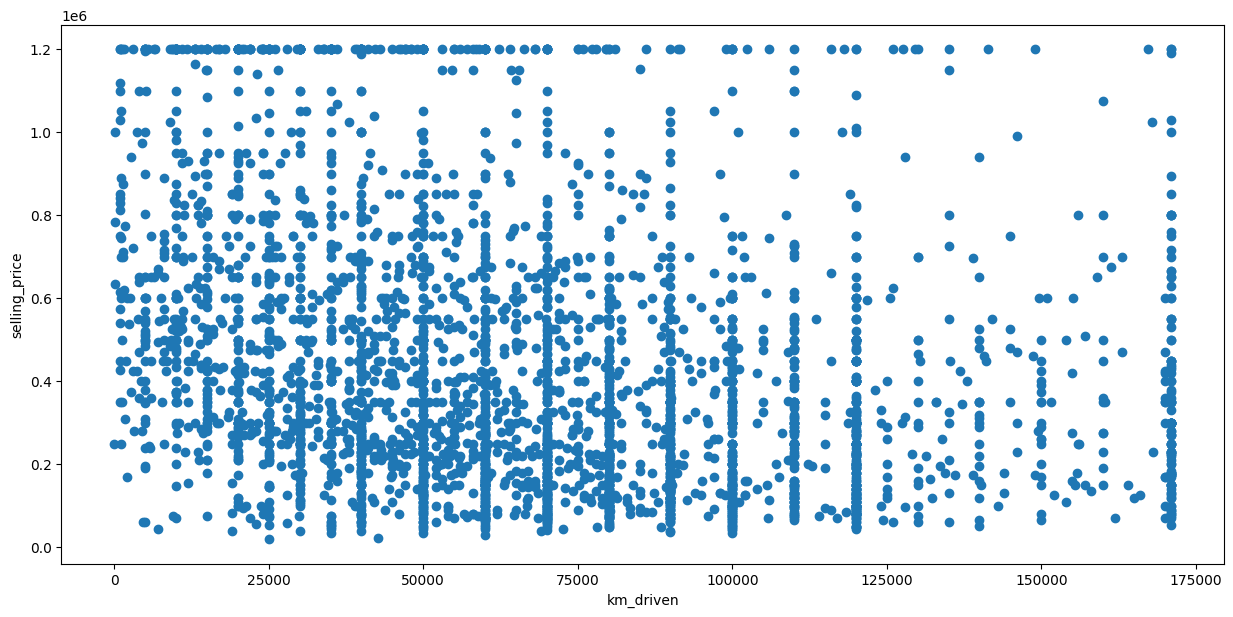

In [127]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.scatter(x = df['km_driven'], y = df['selling_price'])
plt.xlabel('km_driven')
plt.ylabel("selling_price")

plt.show()

In [ ]:
# Сложно различить неочевидные группы, заметно, что в группу наиболее дорогих машин с пробегом выше 75000 км всё реже попадаются экземпляры

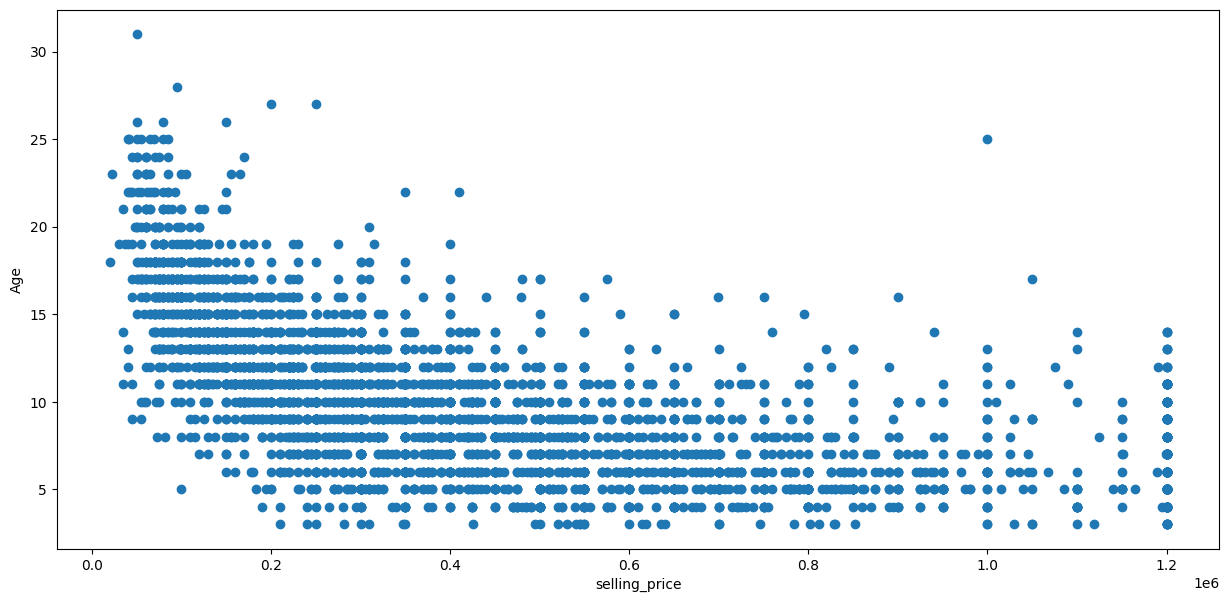

In [128]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.scatter(x = df['selling_price'], y = df['Age'])
plt.xlabel('selling_price')
plt.ylabel("Age")


plt.show()

In [133]:
list(df.columns)

['name',
 'year',
 'Age',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner']

In [155]:
df2 = df[['year',
 'Age',
 'km_driven',
 'selling_price',
 'owner']]
# km_driven'

In [157]:
x = df2.iloc[:, [2, 3]].values
x

array([[ 70000,  60000],
       [ 50000, 135000],
       [100000, 600000],
       ...,
       [ 83000, 110000],
       [ 90000, 865000],
       [ 40000, 225000]], dtype=int64)

C:\Users\Tortik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tortik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tortik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tortik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

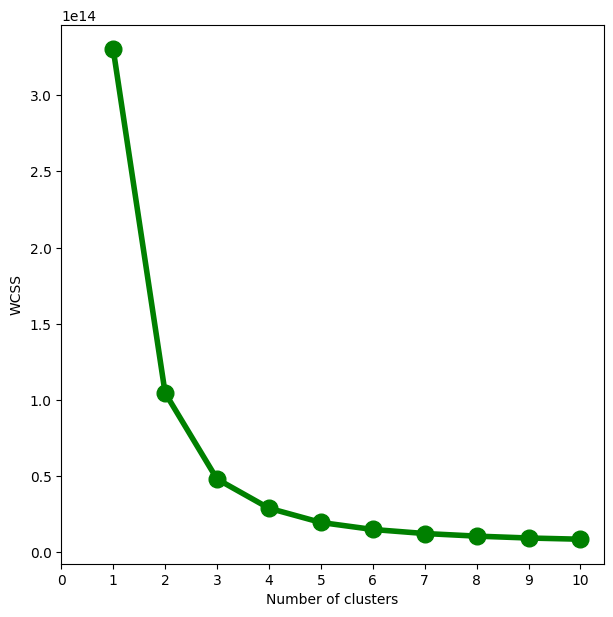

In [158]:
WCSS = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize=(7, 7))
plt.plot(range(1, 11),
         WCSS,
         linewidth=4,
         markersize=12,
         marker='o',
         color='green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [168]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

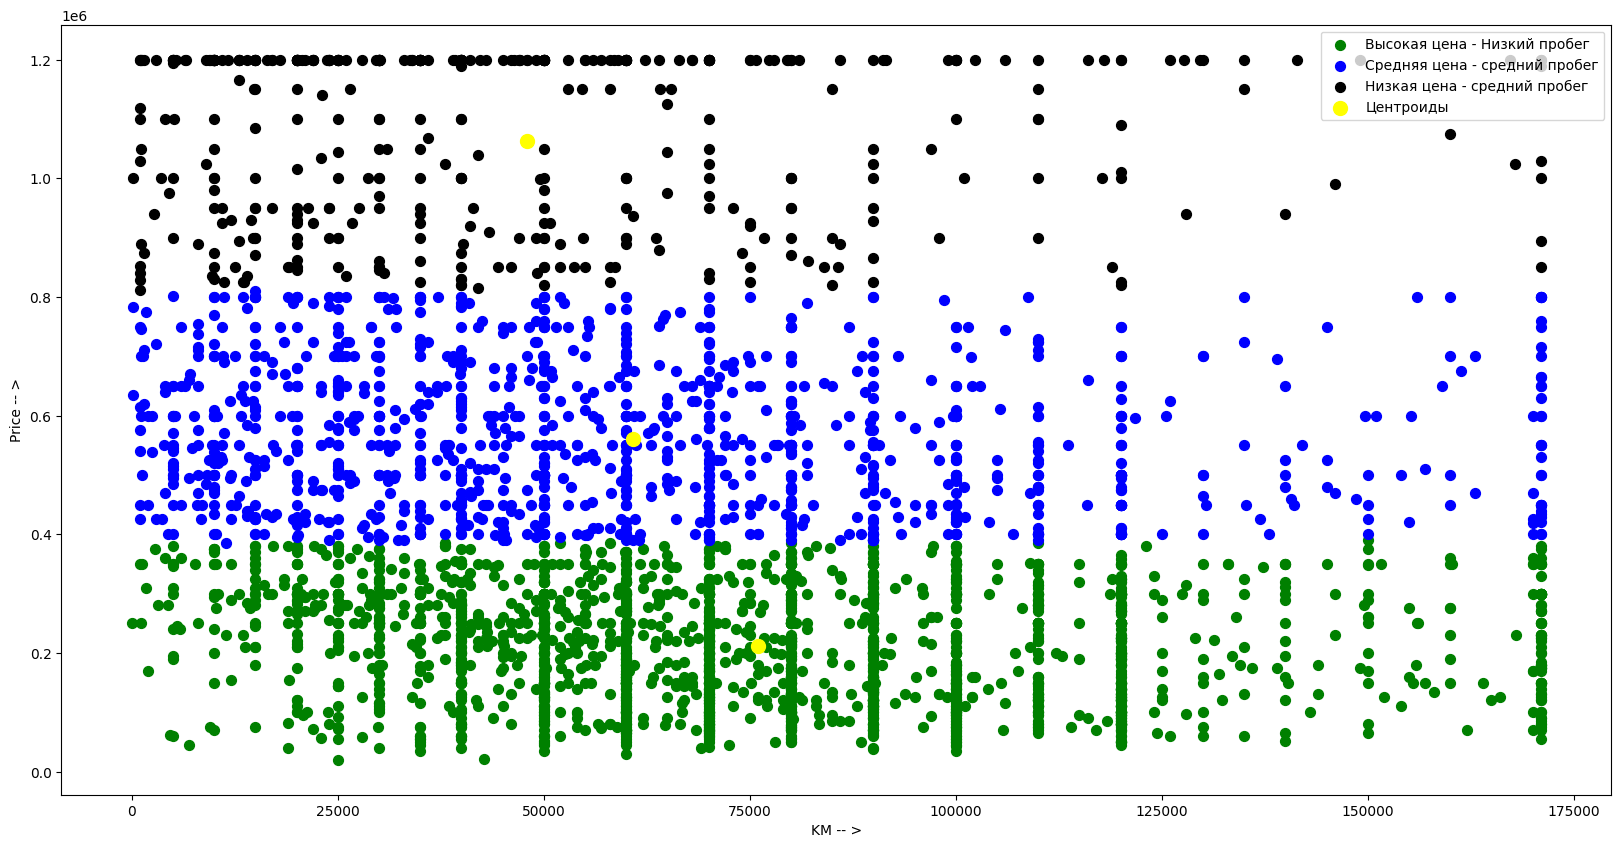

In [172]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green', label = "Высокая цена - Низкий пробег")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "Средняя цена - средний пробег")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'black', label = "Низкая цена - средний пробег")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "Центроиды")
plt.xlabel("KM -- >")
plt.ylabel("Price -- >")
plt.legend()
plt.show()